In [142]:
!pip install joypy -q

In [143]:
import joypy
import pandas as pd
import numpy  as np
import plotly.express  as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from matplotlib import cm
plt.style.use('ggplot')

# Read Data

In [145]:
# Read data
courses_df = pd.read_csv('udemy_courses.csv')

# Print sample
courses_df.sample(5).reset_index(drop=True).style.set_properties(**{'background-color': '#161717','color': '#30c7e6','border-color': '#8b8c8c'})

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,323196,Master Finance in Three Hours,https://www.udemy.com/basic-finance-for-startups-smes-quick-clear-practical/,True,20,721,12,29,Beginner Level,3 hours,2014-10-28T20:48:49Z,Business Finance
1,1114164,Affinity Designer - making seamless patterns,https://www.udemy.com/affinity-designer-making-seamless-patterns/,True,20,35,13,11,All Levels,1 hour,2017-02-20T17:28:21Z,Graphic Design
2,46933,Business Accounts For Managers,https://www.udemy.com/business-accounts-for-managers/,True,30,16,0,23,Beginner Level,3 hours,2013-04-23T13:07:51Z,Business Finance
3,897314,HTTP Clients with Laravel: Use and Consume Services and APIs,https://www.udemy.com/http-clients-with-laravel-use-and-consume-services-and-apis/,True,65,237,22,52,Intermediate Level,3.5 hours,2016-07-18T19:09:21Z,Web Development
4,1232382,Intro to Financial Statement Audits,https://www.udemy.com/intro-financial-statement-audits/,True,50,1,0,9,Intermediate Level,1.5 hours,2017-06-29T18:09:01Z,Business Finance


In [146]:
# Split content_time column into unit and value
courses_df['content_time_value'] = courses_df['content_duration'].str.split(' ').str[0]
courses_df['content_time_unit']  = courses_df['content_duration'].str.split(' ').str[1]

# Inspect contentless cases
courses_df.query("content_time_unit == 'questions'")

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,content_time_value,content_time_unit
93,1259560,Test your knowledge in Basics of Accounting,https://www.udemy.com/test-your-knowledge-in-b...,True,30,1000,11,0,Beginner Level,218 questions,2017-06-20T05:56:52Z,Business Finance,218,questions
95,1270254,Test your Knowledge in Cost Accounting,https://www.udemy.com/test-your-knowledge-in-c...,True,30,999,3,0,All Levels,18 questions,2017-06-27T10:43:44Z,Business Finance,18,questions
847,1271684,Test your Knowledge in Banking Credit Analysis...,https://www.udemy.com/banking-credit-analysis-...,True,30,17,0,0,All Levels,24 questions,2017-06-30T10:45:11Z,Business Finance,24,questions
970,1259396,Test your knowledge in Financial Management,https://www.udemy.com/test-your-knowledge-in-f...,True,30,20,0,0,All Levels,82 questions,2017-06-21T05:05:10Z,Business Finance,82,questions


In [147]:
courses_df.query("content_duration == 'Beginner Level'")

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,content_time_value,content_time_unit
2066,96698,Learn Classical Guitar Technique and play 'Spa...,"000!""",https://www.udemy.com/learnguitartoworship/,TRUE,30,1463,29,52,Beginner Level,3 hours,Musical Instruments,Beginner,Level


Surprisingly, some courses have no lectures at all!

Its just a few of them, and they are essentialy paid assessments.
We'll remove them as the duration does not apply for them.

In [149]:
courses_df.dtypes

course_id               int64
course_title           object
url                    object
is_paid                object
price                  object
num_subscribers         int64
num_reviews             int64
num_lectures            int64
level                  object
content_duration       object
published_timestamp    object
subject                object
content_time_value     object
content_time_unit      object
dtype: object

In [150]:
courses_df['content_time_value'].unique()

array(['1.5', '39', '2.5', '3', '2', '1', '5', '7', '4', '35', '4.5',
       '6.5', '10', '5.5', '7.5', '11.5', '16', '3.5', '9', '8.5', '11',
       '42', '9.5', '218', '18', '33', '62', '8', '41', '31.5', '20', '6',
       '46.5', '43', '17.5', '12', '32', '24', '19.5', '20.5', '30',
       '10.5', '31', '36', '29', '26', '24.5', '13', '44', '34', '12.5',
       '19', '37', '40', '71.5', '47', '14.5', '18.5', '43.5', '38', '14',
       '28', '45', '70', '0', '29.5', '82', '13.5', '27', '21', '68.5',
       '17', '16.5', '15', '78.5', '15.5', '28.5', '23', 'Beginner',
       '32.5', '37.5', '25', '25.5', '60', '22.5', '21.5', '27.5', '44.5',
       '51', '57', '76.5', '22', '30.5', '26.5', '48.5', '23.5', '66.5'],
      dtype=object)

In [151]:
# Remove undesired rows
courses_df = courses_df.drop([93,95,847,970,2066],axis=0).reset_index(drop=True)

# Fix content duration column
courses_df['content_multiplier'] = np.where(courses_df['content_time_unit'] == 'mins',1/60,1)
courses_df['content_duration']   = courses_df['content_time_value'].astype('float') * courses_df['content_multiplier']

In [152]:
courses_df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,content_time_value,content_time_unit,content_multiplier
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,1.5,hours,1.0
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,39,hours,1.0
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,2.5,hours,1.0
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,3,hours,1.0
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,2,hours,1.0


In [153]:
def fix_paid_columns(x):
    if x == 'TRUE':
        return('True')
    elif x == 'FALSE':
        return('False')
    else:
        return(x)

In [154]:
courses_df['is_paid']    = courses_df['is_paid'].apply(fix_paid_columns)
courses_df['engagement'] = courses_df['num_reviews'] / courses_df['num_subscribers']*100

In [155]:
courses_df.to_csv('clean_dataset.csv',index=False)

# General Exploration

Let's start by seeing how the courses are distributed along the dataset.

## % of Topics in the Dataset

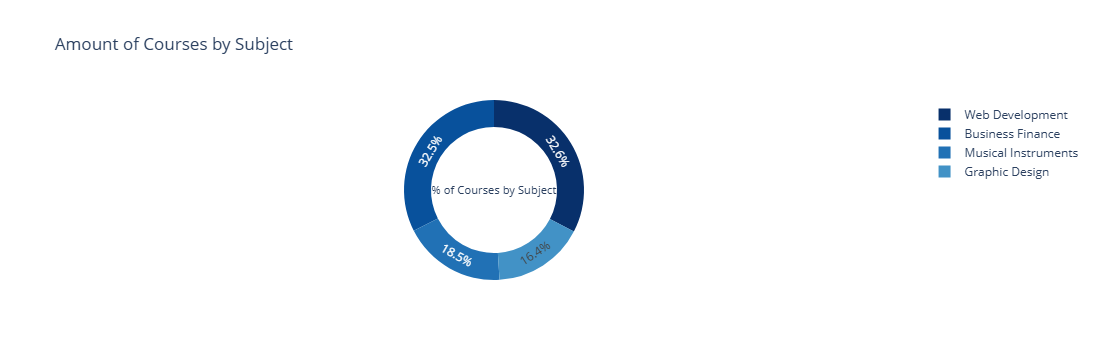

In [159]:
temp_df = pd.DataFrame(courses_df['subject'].value_counts()).reset_index()

fig = go.Figure(data=[go.Pie(labels=temp_df['subject'],
                             values=temp_df['count'],
                             hole=.7,
                             title = '% of Courses by Subject',
                             marker_colors = px.colors.sequential.Blues_r,
                            )
                     
                     ])
fig.update_layout(title='Amount of Courses by Subject')
fig.show()

In [160]:
temp_df

,subject,count
0,Web Development,1200
1,Business Finance,1195
2,Musical Instruments,680
3,Graphic Design,603


## Course Duration Distribution

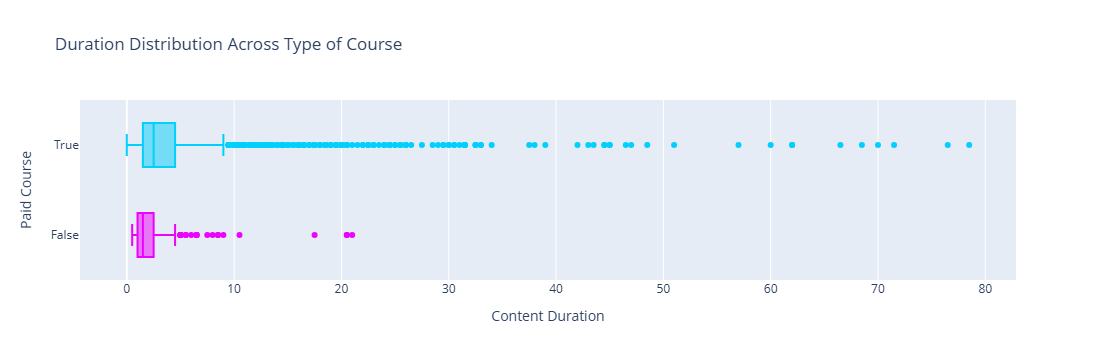

In [162]:
fig = px.box(courses_df,
       x='content_duration',
       y='is_paid',
       orientation='h',
       color='is_paid',
       title='Duration Distribution Across Type of Course',
       color_discrete_sequence=['#03cffc','#eb03fc']
      )


fig.update_layout(showlegend=False)
fig.update_xaxes(title='Content Duration')
fig.update_yaxes(title='Paid Course')
fig.show()

We can see that **paid courses** have a higher duration, with an average of **2.5 hours**, whereas **free courses** have a median of **1.5 hours**.
It is also worth noting that duration varies considerabily more on paid courses as well.

Let's see that same plot stratified by subject.

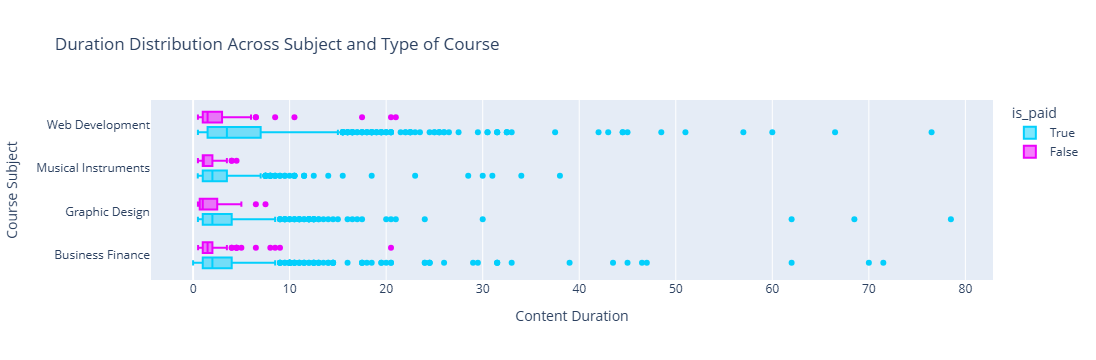

In [164]:
fig = px.box(courses_df,
       x='content_duration',
       y='subject',
       orientation='h',
       color='is_paid',
       title='Duration Distribution Across Subject and Type of Course',
       color_discrete_sequence=['#03cffc','#eb03fc']
      )


fig.update_xaxes(title='Content Duration')
fig.update_yaxes(title='Course Subject')
fig.show()

# Exploring Paid Courses

In [166]:
# Filter paid courses
paid_courses_df = courses_df.query("price != 'Free'").sort_values('num_reviews',ascending=False)
paid_courses_df['price'] = paid_courses_df['price'].astype('float32')

In [167]:
paid_courses_df['price'].head(10)

3230    200.0
3232    200.0
3204    190.0
3247    175.0
3254    180.0
3246    175.0
3251    195.0
3228    150.0
1979    200.0
3249    195.0
Name: price, dtype: float32

## How are Course Prices Distributed?

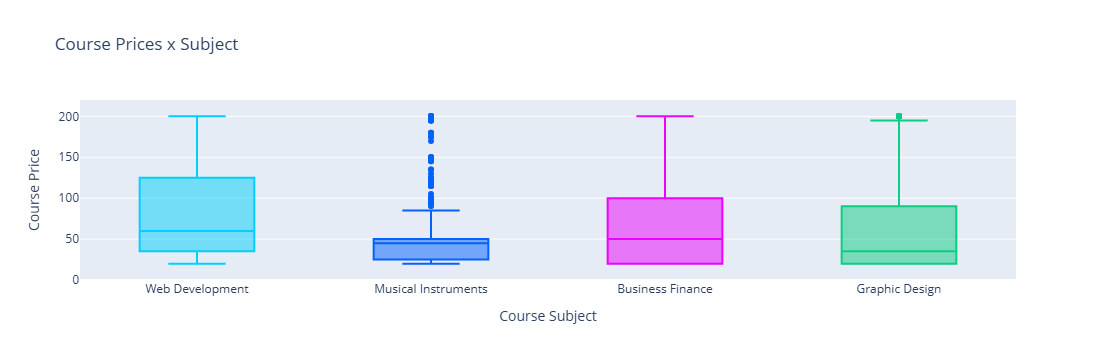

In [169]:
fig = px.box(paid_courses_df,
             x     = 'subject',
             y     = 'price',
             color = 'subject',
             title = 'Course Prices x Subject',
             color_discrete_sequence = ['#03cffc','#0362fc','#eb03fc','#0ecc83'],
             hover_name = 'course_title',
            )

fig.update_layout(showlegend=False)
fig.update_yaxes(range=[0,220], title='Course Price')
fig.update_xaxes(title='Course Subject')
fig.show()

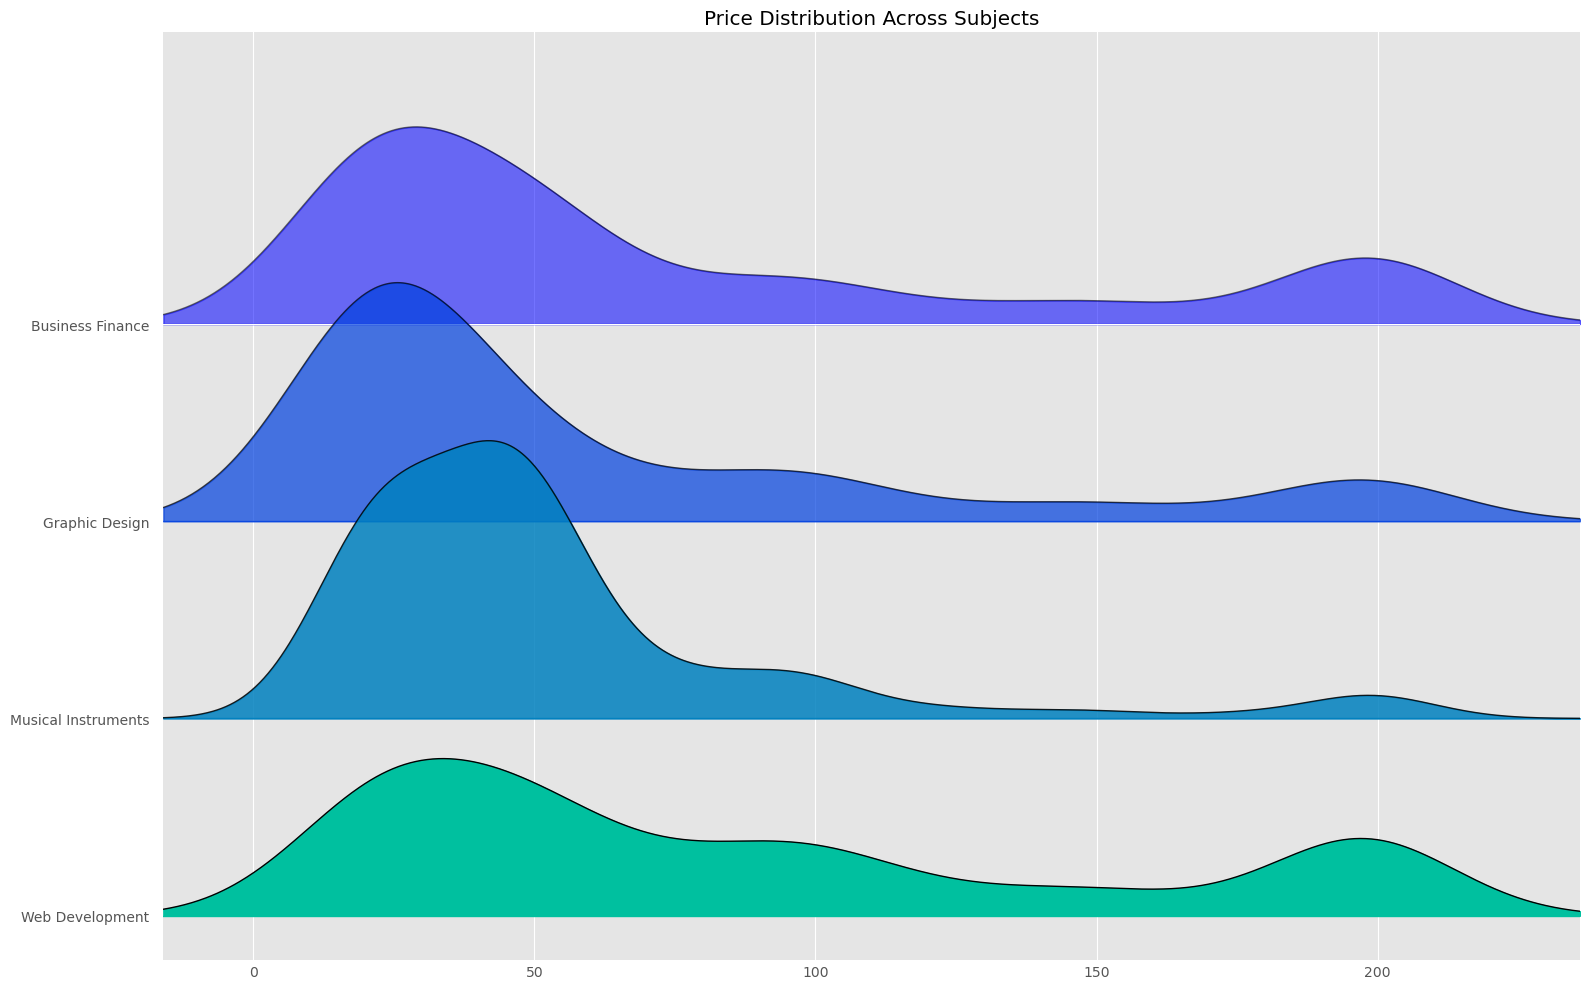

In [170]:
# Ridgeline Plot
fig = joypy.joyplot(paid_courses_df,
                    by      = 'subject',
                    column  = 'price',
                    figsize = (16,10),
                    grid    = 'both',
                    linewidth = 1,
                    colormap  = cm.winter,
                    fade      = True,
                    title     = 'Price Distribution Across Subjects',
                    overlap   = 2
                   )
plt.show()

## Top 25 Most Popular Paid Courses

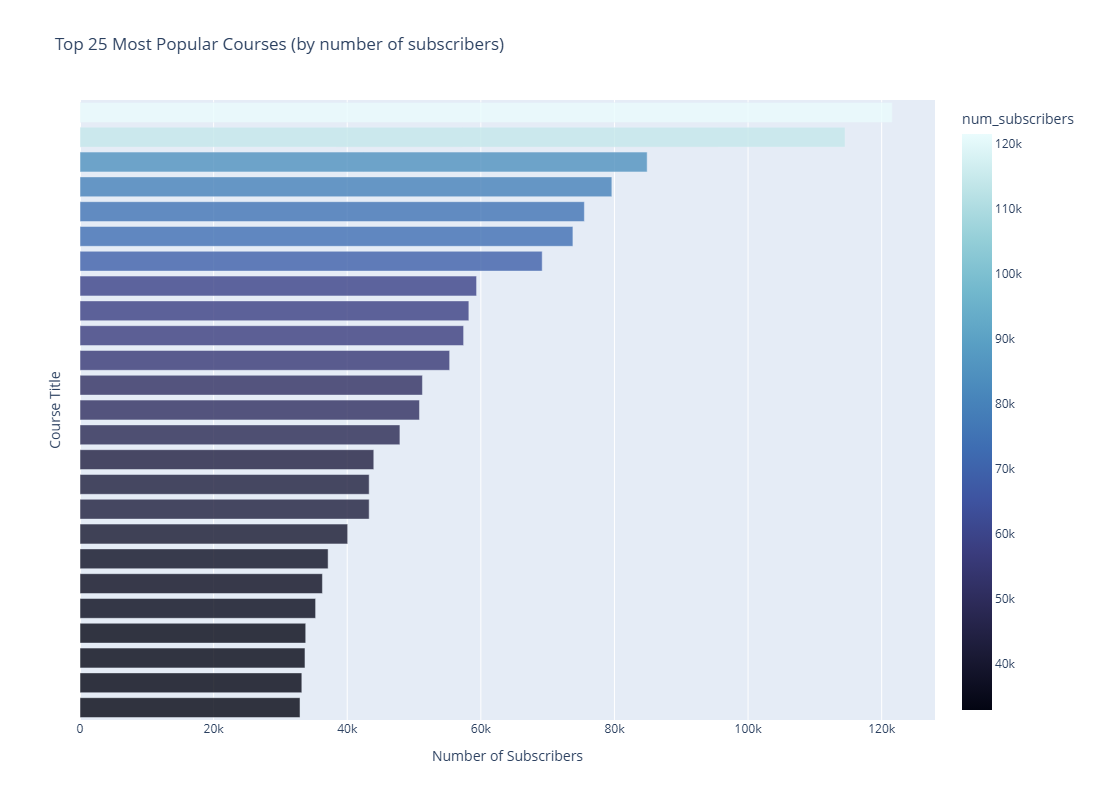

In [172]:
top25_paid = paid_courses_df.sort_values("num_subscribers", ascending=False)[0:25].sort_values("num_subscribers", ascending=True).reset_index(drop=True).reset_index()

fig = px.bar(top25_paid,
               y    = 'index',
               x    = 'num_subscribers',
               orientation = 'h',
               color       = 'num_subscribers',
               hover_name  = 'course_title',
               title       = 'Top 25 Most Popular Courses (by number of subscribers)',
               opacity     = 0.8,
               color_continuous_scale = px.colors.sequential.ice,
               height = 800,
              )

fig.update_layout(showlegend=False)
fig.update_xaxes(title='Number of Subscribers')
fig.update_yaxes(title='Course Title',showticklabels=False)
fig.show()

# Exploring Free Courses

In [174]:
free_courses_df = courses_df.query("price == 'Free'").sort_values('num_reviews',ascending=False)

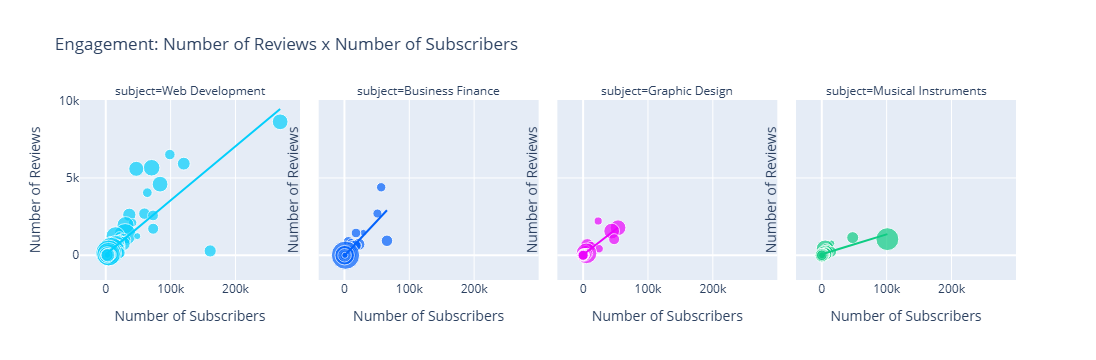

In [175]:
fig = px.scatter(free_courses_df,
       size = 'num_lectures',
       x    = 'num_subscribers',
       y    = 'num_reviews',
       trendline = 'ols',
       facet_col ='subject',
       color = 'subject',
       color_discrete_sequence = ['#03cffc','#0362fc','#eb03fc','#0ecc83'],
       hover_name= 'course_title',
       title='Engagement: Number of Reviews x Number of Subscribers'
      )

fig.update_layout(showlegend=False)
fig.update_xaxes(title='Number of Subscribers')
fig.update_yaxes(title='Number of Reviews')
fig.show()

Our plot is being dragged too much due to some outliers.
These outliers have either a great amount of reviews (>2000) or great number of subscribers (>10000).

It is interesting to point out that some courses are anomalies in terms of reviews x subscribers.



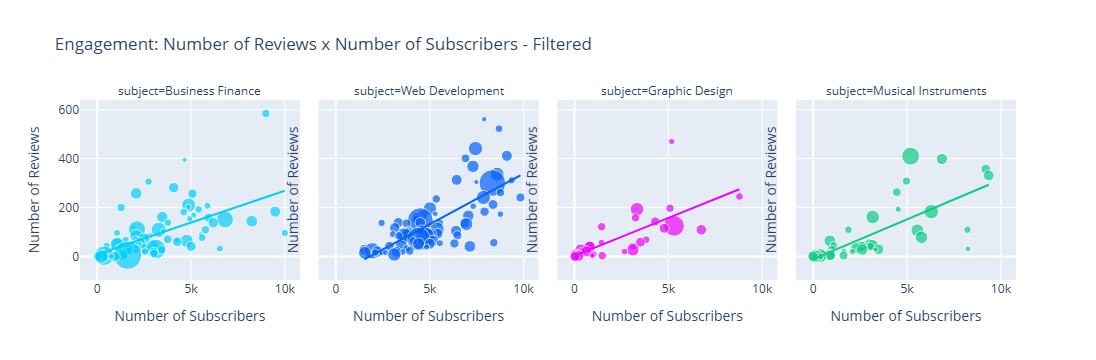

In [177]:
fig = px.scatter(free_courses_df.query("num_reviews <= 600 and num_subscribers <= 10000"),
       size = 'num_lectures',
       x    = 'num_subscribers',
       y    = 'num_reviews',
       trendline = 'ols',
       facet_col = 'subject',
       color     = 'subject',
       color_discrete_sequence = ['#03cffc','#0362fc','#eb03fc','#0ecc83'],
       hover_name = 'course_title',
       title      = 'Engagement: Number of Reviews x Number of Subscribers - Filtered'
      )

fig.update_layout(showlegend=False)
fig.update_xaxes(title='Number of Subscribers')
fig.update_yaxes(title='Number of Reviews')
fig.show()

## Top 25 Most Popular Free Courses

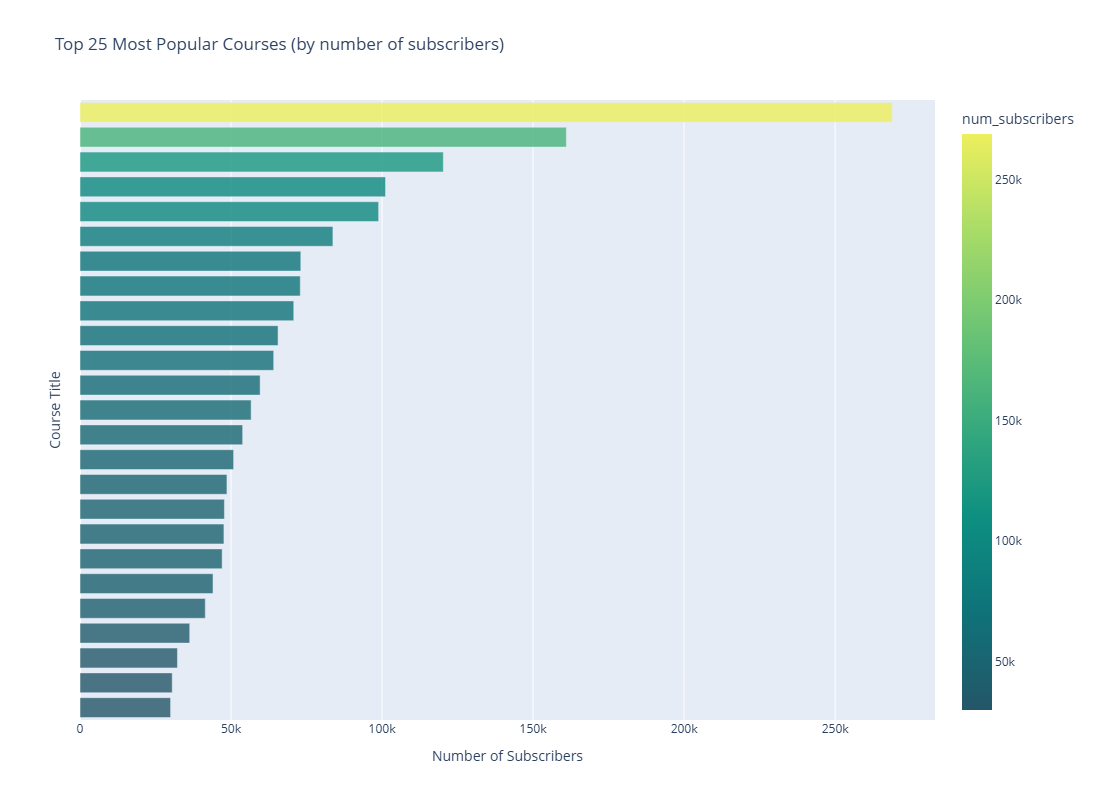

In [179]:
top25_free = free_courses_df.sort_values("num_subscribers", ascending=False)[0:25].sort_values("num_subscribers", ascending=True).reset_index(drop=True).reset_index()
fig = px.bar(top25_free,
               y    = 'index',
               x    = 'num_subscribers',
               orientation = 'h',
               color       = 'num_subscribers',
               hover_name  = 'course_title',
               title       = 'Top 25 Most Popular Courses (by number of subscribers)',
               opacity     = 0.8,
               color_continuous_scale = px.colors.sequential.Aggrnyl,
               height = 800,
              )

fig.update_layout(showlegend=False)
fig.update_xaxes(title='Number of Subscribers')
fig.update_yaxes(title='Course Title',showticklabels=False)
fig.show()

### To be Added
- Reviews/subscribers - engagement
- Top 10 courses by subject
- Top quality / price
- Sunburst: subject + is_paid
- Correlation: Price, reviews, subscribers, duration

In [181]:
courses_df['engagement']

0        1.071262
1       33.058739
2        3.403864
3        0.448796
4        3.526646
          ...    
3673     1.346154
3674     0.980392
3675    32.943470
3676    10.333333
3677     3.995560
Name: engagement, Length: 3678, dtype: float64

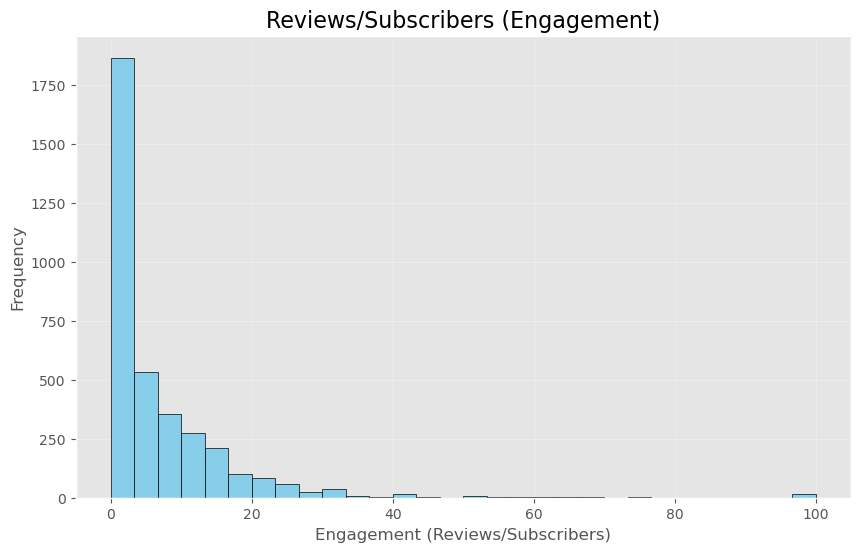

In [191]:
# Plot - Reviews/subscribers - engagement
plt.figure(figsize=(10, 6))
plt.hist(courses_df['engagement'], bins=30, color='skyblue', edgecolor='black')
plt.title('Reviews/Subscribers (Engagement)', fontsize=16)
plt.xlabel('Engagement (Reviews/Subscribers)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

C:\Users\prith\AppData\Local\Temp\ipykernel_31820\1549387471.py:3: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



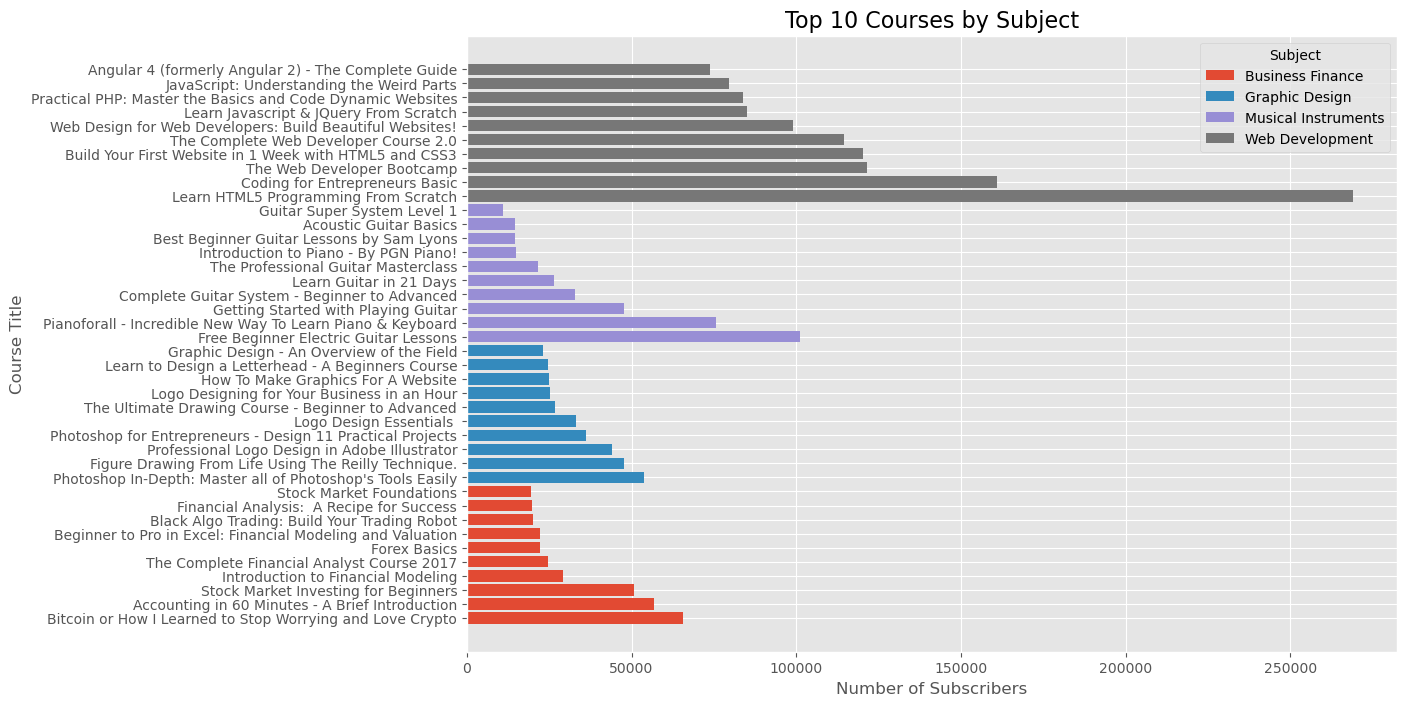

In [193]:
#2. Top 10 Courses by Subject
# Group by subject and find the top 10 courses based on subscribers
top_courses = courses_df.groupby('subject').apply(lambda x: x.nlargest(10, 'num_subscribers')).reset_index(drop=True)

# Plot
plt.figure(figsize=(12, 8))
for subject in top_courses['subject'].unique():
    subset = top_courses[top_courses['subject'] == subject]
    plt.barh(subset['course_title'], subset['num_subscribers'], label=subject)

plt.title('Top 10 Courses by Subject', fontsize=16)
plt.xlabel('Number of Subscribers', fontsize=12)
plt.ylabel('Course Title', fontsize=12)
plt.legend(title='Subject', fontsize=10)
plt.show()


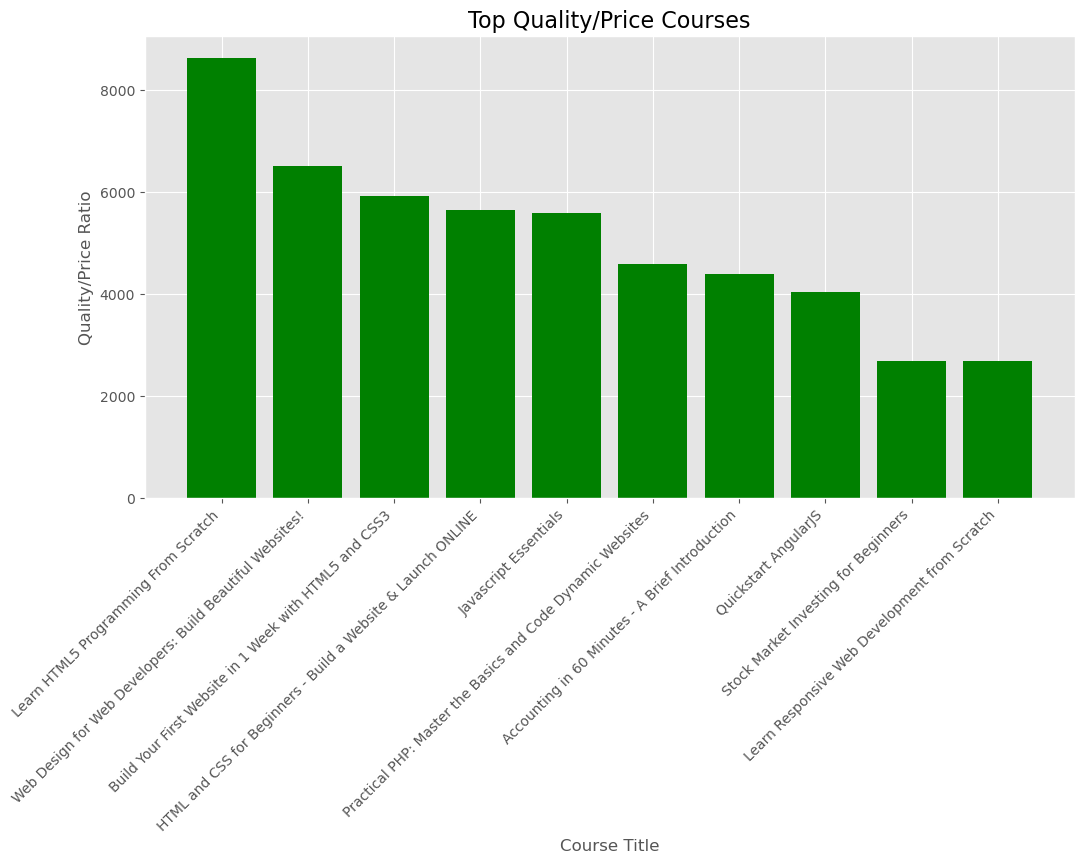

In [195]:
#3. Top Quality/Price

# Ensure 'price' is numeric
courses_df['price'] = pd.to_numeric(courses_df['price'], errors='coerce')
courses_df['price'] = courses_df['price'].fillna(0)  # Replace NaN with 0

# Calculate quality/price ratio
courses_df['quality_price_ratio'] = courses_df['num_reviews'] / (courses_df['price'] + 1)

# Top courses based on quality/price
top_quality_price = courses_df.nlargest(10, 'quality_price_ratio')

# Plot
plt.figure(figsize=(12, 6))
plt.bar(top_quality_price['course_title'], top_quality_price['quality_price_ratio'], color='green')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title('Top Quality/Price Courses', fontsize=16)
plt.xlabel('Course Title', fontsize=12)
plt.ylabel('Quality/Price Ratio', fontsize=12)
plt.show()

In [197]:
courses_df['quality_price_ratio'] 

0        0.114428
1       12.144737
2        1.608696
3        0.114583
4        0.223881
          ...    
3673     0.138614
3674     0.115385
3675     4.121951
3676     0.607843
3677     0.782609
Name: quality_price_ratio, Length: 3678, dtype: float64

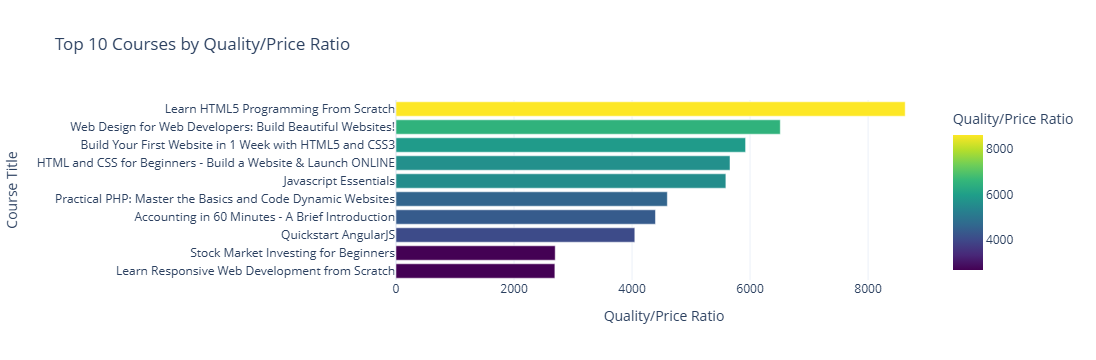

In [199]:
# Plot using Plotly
fig = px.bar(
    top_quality_price,
    x='quality_price_ratio',
    y='course_title',
    orientation='h',
    title='Top 10 Courses by Quality/Price Ratio',
    labels={'quality_price_ratio': 'Quality/Price Ratio', 'course_title': 'Course Title'},
    color='quality_price_ratio',
    color_continuous_scale='Viridis'
)

fig.update_layout(
    xaxis_title="Quality/Price Ratio",
    yaxis_title="Course Title",
    yaxis={'categoryorder': 'total ascending'},
    template='plotly_white'
)

fig.show()

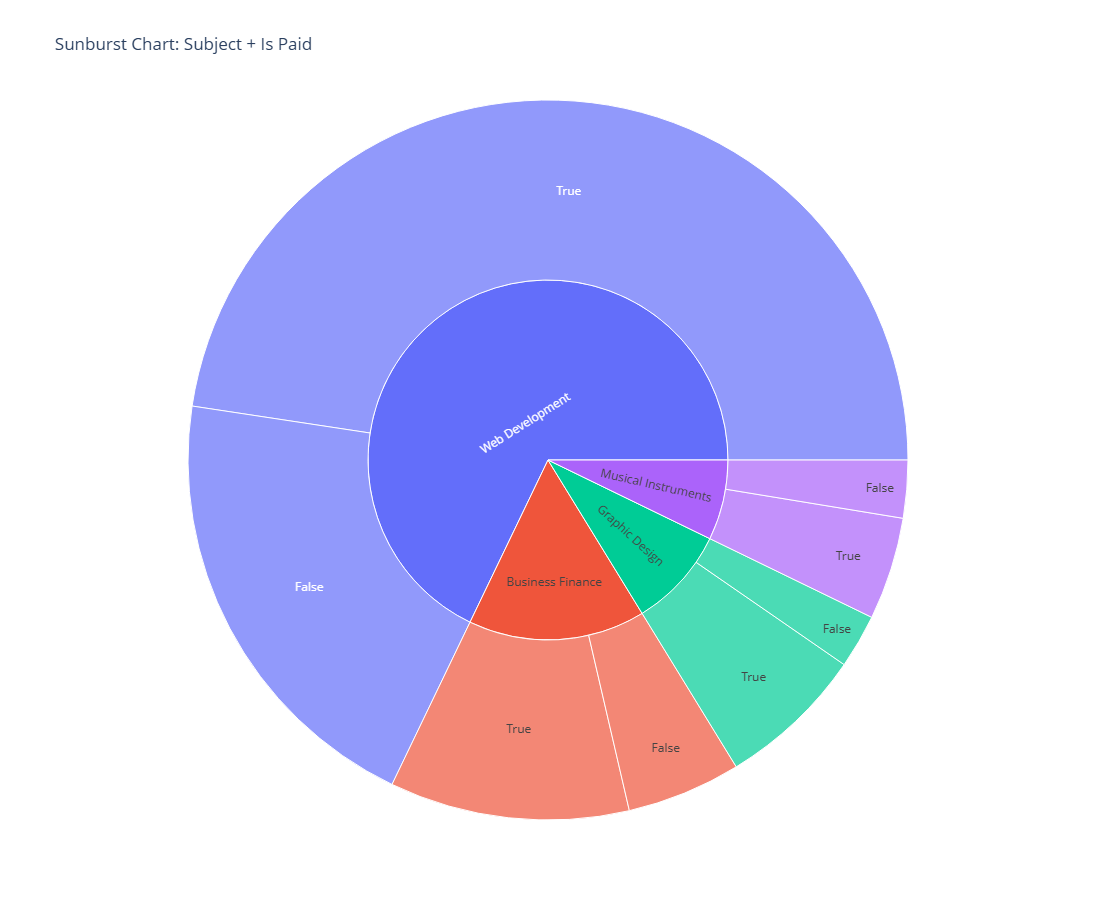

In [201]:
#Sunburst Chart: Subject + Is Paid
# Create Sunburst chart
fig = px.sunburst(
    courses_df,
    path=['subject', 'is_paid'],
    values='num_subscribers',
    title='Sunburst Chart: Subject + Is Paid'
)


# Adjust layout for a larger chart
fig.update_layout(
    width=1200,  # Increase the width
    height=900,  # Increase the height
    template='plotly_white'
)

# Display the chart
fig.show()



# Insights from the Sunburst Chart
## Subject Popularity:

The outer circle segments show the split between paid and free courses for each subject.
Larger slices indicate subjects with a higher number of subscribers. For example, if "Web Development" takes up a significant portion, it’s a highly sought-after subject.

## Paid vs. Free Courses:

Some subjects may have a larger percentage of free courses, while others may predominantly offer paid content.
This helps to identify whether learners are more inclined towards free content in certain domains or are willing to pay for premium content in others.
## Subscriber Trends:

Paid courses might dominate in professional subjects (e.g., Business or Finance), where learners are willing to invest in skill-building.
Free courses are likely more popular in entry-level or exploratory subjects (e.g., Programming Basics).
Strategic Opportunities:

If you're a course creator, offering a free introductory course in subjects with many paid courses could attract subscribers and create a pipeline for premium content.
Learners can identify subjects where free options are more prevalent, providing cost-effective learning opportunities.


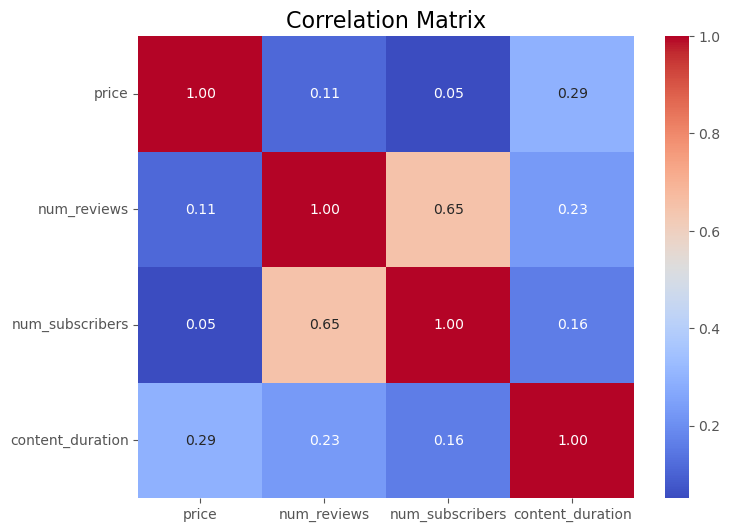

In [205]:
import seaborn as sns

#Correlation Heatmap: Price, Reviews, Subscribers, Duration
# Select columns of interest
correlation_data = courses_df[['price', 'num_reviews', 'num_subscribers', 'content_duration']]

# Compute correlation matrix
correlation_matrix = correlation_data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix', fontsize=16)
plt.show()